In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from src.data_manipulation import transform_data_datetime
from src.data_manipulation import process_grib_file, create_hourly_dataset, create_daily_aggregate

# Puglia Data Analysis

## Processing Copernicus Data

In [18]:
# Process the file
# Bari 41.14043890868558, 16.86619063277282
# Lecce 40.35654102220363, 18.17311913754415
# London 51.5074, -0.1278
file_name = 'data_puglia_tp_2020_2025'
output_variable = file_name.split('_')[2]
city_name = file_name.split('_')[1]
file_path = "./data/ERA5/" + output_variable + '/' + city_name + '/' + file_name + '.grib'

# city_lat = 51.5074  # London latitude
# city_lon = -0.1278  # London longitude
# city_lat = 41.14043890868558  # Bari latitude
# city_lon = 16.86619063277282  # Bari longitude
city_lat = 40.35654102220363  # Bari latitude
city_lon = 18.17311913754415  # Bari longitude




output_variable = output_variable
city_name = city_name
dubug = True

df_test = process_grib_file(grib_file_path = file_path,
                            city_lat=city_lat,
                            city_lon=city_lon,
                            output_variable=output_variable,
                            city_name=city_name,
                            print_debug=dubug
                            )

Reading GRIB file: ./data/ERA5/tp/puglia/data_puglia_tp_2020_2025.grib
breakpoint 0


c:\ProgramData\anaconda3\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


Dataset 0:
Variables: ['tp']
Time range: 2019-12-31T18:00:00.000000000 to 2025-06-26T06:00:00.000000000
---


c:\ProgramData\anaconda3\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


breakpoint 1
Longitude range: 15.5 to 18.5
Using -180-180 longitude format: -18.17311913754415
Target coordinates: (40.35654102220363, -18.17311913754415)
Nearest grid point: (40.3, 15.5)
****
 - inside csv Time range: 2019-12-31 18:00:00 to 2025-06-26 06:00:00
 - min time as string: 20191231
 - max time as string: 20250626
tp_20191231_20250626
DataFrame shape: (48096, 10)
DataFrame columns: ['time', 'step', 'number', 'surface', 'latitude', 'longitude', 'valid_time', 'tp', 'target_latitude', 'target_longitude']
grib to csv
ds.data_vars dtype: <class 'xarray.core.dataset_variables.DataVariables'>, df.data_vars name: tp
./output/tp//puglia//puglia_tp_20191231_20250626.csv
./output/tp//puglia//puglia_tp_20191231_20250626.csv
Saving DataFrame to: ./output/tp//puglia//puglia_tp_20191231_20250626.csv

Data saved to: ./output/tp//puglia//puglia_tp_20191231_20250626.csv

SUMMARY
Total records: 48096
Time range: 2019-12-31 18:00:00 to 2025-06-26 06:00:00
Variables extracted: ['step', 'number', 

In [ ]:
df_test.head()

In [ ]:
# 

bari_tp_hourly = create_hourly_dataset(files_base_folder='./output',
                                       weather_var='tp',
                                       city = 'puglia')

bari_tp_hourly.head()

In [20]:
lecce_tp_hourly = create_hourly_dataset(files_base_folder='./output',
                                       weather_var='tp',
                                       city = 'puglia')

lecce_tp_hourly.head()

['puglia_tp_19931231_20041231.csv', 'puglia_tp_20041231_20101231.csv', 'puglia_tp_20101231_20191231.csv', 'puglia_tp_20191231_20250626.csv']
['output\\tp\\puglia\\puglia_tp_19931231_20041231.csv', 'output\\tp\\puglia\\puglia_tp_20041231_20101231.csv', 'output\\tp\\puglia\\puglia_tp_20101231_20191231.csv', 'output\\tp\\puglia\\puglia_tp_20191231_20250626.csv']
(96432, 3)
(52584, 3)
(78888, 3)
(48083, 3)
(275987, 3)
(275987, 3)
duplicated records: 0
duplicated records after mean: 0
dataframe new shape: (275987, 3)
number of expected records: 275987


,valid_time,tp,tp_mm,hour_of_day,year,month int,month,day
0,1994-01-01 00:00:00,0.0,0.0,0,1994,1,Jan,1
1,1994-01-01 01:00:00,0.0,0.0,1,1994,1,Jan,1
2,1994-01-01 02:00:00,0.0,0.0,2,1994,1,Jan,1
3,1994-01-01 03:00:00,0.0,0.0,3,1994,1,Jan,1
4,1994-01-01 04:00:00,0.0,0.0,4,1994,1,Jan,1


In [2]:
bari_tp_daily = create_daily_aggregate(file_folder = './output/tp/puglia/',
                                       file_name = 'puglia_tp_hourly_data.pkl',
                                       rainyday_threshold = 0.05)



city = puglia, var = tp
(275987, 8)
columns = Index(['valid_time', 'year', 'month', 'day', 'tp', 'tp_mm', 'hour_of_day',
       'month int'],
      dtype='object')
./output/tp/puglia/puglia_tp_daily_data.pkl


In [21]:
lecce_tp_daily = create_daily_aggregate(file_folder = './output/tp/puglia/',
                                        file_name = 'puglia_tp_hourly_data.pkl',
                                        rainyday_threshold = 0.05)


city = puglia, var = tp
(275987, 8)
columns = Index(['valid_time', 'year', 'month', 'day', 'tp', 'tp_mm', 'hour_of_day',
       'month int'],
      dtype='object')
./output/tp/puglia/puglia_tp_daily_data.pkl


In [3]:
bari_tp_daily.head()

,date,year,month,day,tp_daily_sum,tp_daily_mean,tp_daily_std,tp_daily_median,tp_daily_max,tp_daily_min,tp_mm_daily_sum,tp_mm_daily_mean,tp_mm_daily_std,tp_mm_daily_median,tp_mm_daily_min,tp_mm_daily_max,month_int,rainy_day
0,1994-01-01,1994,Jan,1,0.003251,1.354504e-04,3.455258e-04,4.678965e-06,0.001364,0.0,3.250810,0.135450,0.345526,0.004679,0.0,1.364470,1,1
1,1994-01-02,1994,Jan,2,0.003174,1.322703e-04,2.715478e-04,0.000000e+00,0.000899,0.0,3.174487,0.132270,0.271548,0.000000,0.0,0.898555,1,1
2,1994-01-03,1994,Jan,3,0.000010,4.286412e-07,8.939233e-07,0.000000e+00,0.000003,0.0,0.010287,0.000429,0.000894,0.000000,0.0,0.003427,1,0
3,1994-01-04,1994,Jan,4,0.000054,2.264782e-06,2.665145e-06,1.236796e-06,0.000010,0.0,0.054355,0.002265,0.002665,0.001237,0.0,0.009820,1,1
4,1994-01-05,1994,Jan,5,0.000686,2.857763e-05,5.155977e-05,7.599592e-07,0.000174,0.0,0.685863,0.028578,0.051560,0.000760,0.0,0.174046,1,1


In [7]:
bari_tp_daily[bari_tp_daily['rainy_day'] == 0]['year'].value_counts()[:15].reset_index()

,year,count
0,1994,192
1,1997,190
2,2020,187
3,2022,185
4,2000,183
5,2017,182
6,1998,182
7,2012,175
8,1999,174
9,2001,172


In [8]:
bari_tp_daily.columns

Index(['date', 'year', 'month', 'day', 'tp_daily_sum', 'tp_daily_mean',
       'tp_daily_std', 'tp_daily_median', 'tp_daily_max', 'tp_daily_min',
       'tp_mm_daily_sum', 'tp_mm_daily_mean', 'tp_mm_daily_std',
       'tp_mm_daily_median', 'tp_mm_daily_min', 'tp_mm_daily_max', 'month_int',
       'rainy_day'],
      dtype='object')

In [13]:
bari_yearly_aggregate = (bari_tp_daily[bari_tp_daily['year'] < 2025]
                         .groupby('year', observed = True)['tp_mm_daily_sum']
                         .sum()
                         ).reset_index()

bari_yearly_aggregate.head()

,year,tp_mm_daily_sum
0,1994,541.905219
1,1995,590.955195
2,1996,778.080223
3,1997,648.536640
4,1998,693.190134


In [22]:
lecce_yearly_aggregate = (lecce_tp_daily[bari_tp_daily['year'] < 2025]
                         .groupby('year', observed = True)['tp_mm_daily_sum']
                         .sum()
                         ).reset_index()

lecce_yearly_aggregate.head()

,year,tp_mm_daily_sum
0,1994,862.509384
1,1995,1229.768974
2,1996,1463.361756
3,1997,890.239271
4,1998,1217.190115


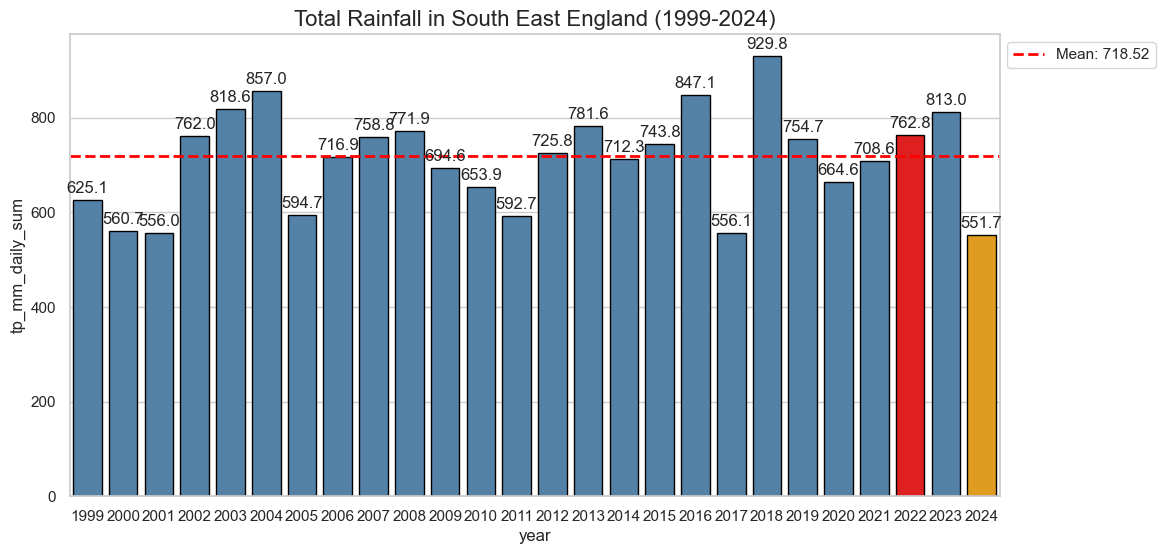

In [14]:
from src.data_plotting import plot_rainfall

plot_rainfall(
    bari_yearly_aggregate,
    start_year=1999,
    latest_year=2024,
    feature='tp_mm_daily_sum'
)

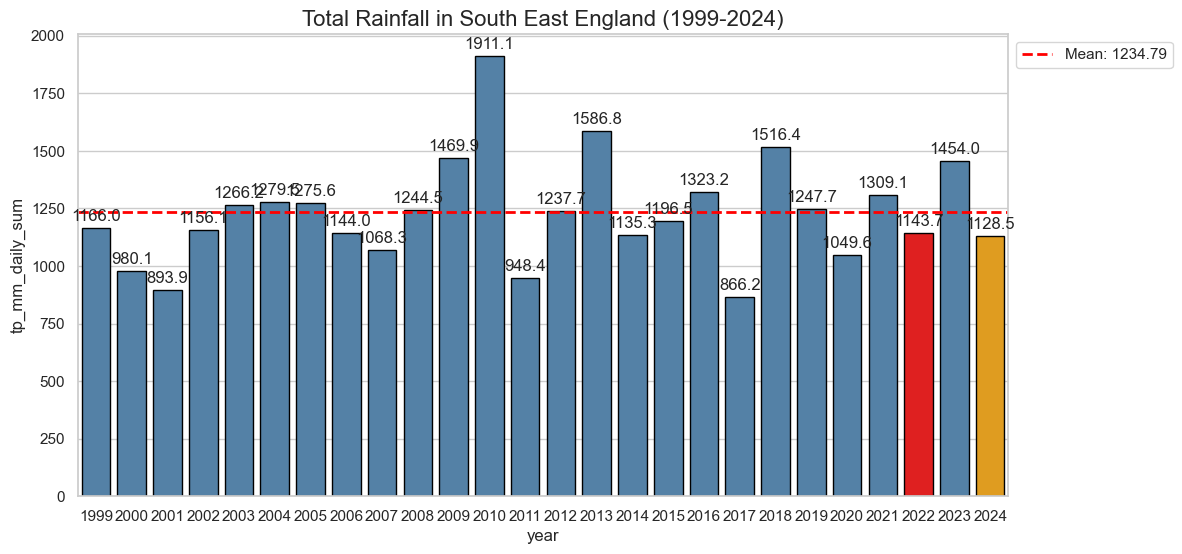

In [23]:
plot_rainfall(
    lecce_yearly_aggregate,
    start_year=1999,
    latest_year=2024,
    feature='tp_mm_daily_sum'
)

In [39]:
lecce_tp_daily.columns

Index(['date', 'year', 'month', 'day', 'tp_daily_sum', 'tp_daily_mean',
       'tp_daily_std', 'tp_daily_median', 'tp_daily_max', 'tp_daily_min',
       'tp_mm_daily_sum', 'tp_mm_daily_mean', 'tp_mm_daily_std',
       'tp_mm_daily_median', 'tp_mm_daily_min', 'tp_mm_daily_max', 'month_int',
       'rainy_day'],
      dtype='object')

In [48]:
import calendar
# The correct approach for mean monthly precipitation
monthly_precipitation = bari_tp_daily.groupby(['year', 'month'])['tp_mm_daily_sum'].sum().reset_index()
monthly_precipitation.columns = ['year', 'month', 'monthly_total']

# Convert month to categorical for proper ordering
month_order = list(calendar.month_abbr)[1:]
monthly_precipitation['month'] = pd.Categorical(monthly_precipitation['month'], 
                                              categories=month_order, ordered=True)

# Calculate mean monthly precipitation across years
mean_monthly_precip = monthly_precipitation.groupby('month')['monthly_total'].mean()
mean_monthly_precip.reset_index()

C:\Users\pacor\AppData\Local\Temp\ipykernel_9976\74623423.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_monthly_precip = monthly_precipitation.groupby('month')['monthly_total'].mean()


,month,monthly_total
0,Jan,69.544224
1,Feb,61.237001
2,Mar,66.458471
3,Apr,63.049135
4,May,61.115656
5,Jun,42.442892
6,Jul,41.794664
7,Aug,37.995257
8,Sep,51.783745
9,Oct,62.185846


- Data Source: hourly data

In [ ]:
bari_data = pd.read_csv('./output/ERA5_hourly_data_on_single_levels_from_2020_to_2024_Bari.csv')
print(bari_data.shape)
bari_data.head()

In [ ]:
bari_data.tail()

In [ ]:
lecce_data = pd.read_csv('./output/ERA5_hourly_data_on_single_levels_from_2020_to_2024_Lecce.csv')
print(lecce_data.shape)
lecce_data.head()

In [ ]:
transform_data_to_complete_dataset(bari_data)

- Data Source: [Copernicus Reanalysis](https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels-timeseries?tab=overview).

Downloaded data from 2 different longitude and latitude to compare the precipitation and temperature values.

In [ ]:
puglia_1 = pd.read_csv('./data/puglia/reanalysis-era5-single-levels-timeseries-puglia1.csv')
puglia_2 = pd.read_csv('./data/puglia/reanalysis-era5-single-levels-timeseries-puglia2.csv')

In [ ]:
print(puglia_1.shape)
print(puglia_2.shape)

In [ ]:
puglia_1.head(5)

In [ ]:
puglia_2.tail(5)

In [ ]:
puglia_1.dtypes

In [ ]:
# creating a function transforming the data format in a more
# convenient way for furhter analysis

# steps
## valid_time -> datetime
## tp -> RR_mm

def transform_data_to_complete_dataset(df):
    '''
    First step in transforming raw data
    it takes the dataframe and creates a new dataframe with the following columns:
    - valid_time: datetime object
    - RR_mm: precipitation in mm (converted from tp)
    - t2m_celsius: temperature in Celsius (converted from t2m)
    '''
    df = df.copy()
    df['valid_time'] = pd.to_datetime(df['valid_time'], format='%Y-%m-%d %H:%M:%S')
    df['valid_datetime'] = df['valid_time'].dt.date
    
    df.sort_values(by='valid_time', inplace=True)
    df.reset_index(drop=True, inplace=True)
    
    df['RR_mm'] = df['tp'] * 1000  # Convert tp from m to mm
    df['t2m_celsius'] = df['t2m'] - 273.15  # Convert temperature from Kelvin to Celsius
    df.sort_values(by='valid_time', inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df[['valid_time', 'valid_datetime', 'RR_mm', 't2m_celsius', 'tp', 't2m', 'longitude', 'latitude']]

In [ ]:
df_puglia_01 = transform_data_to_complete_dataset(puglia_1)
df_puglia_02 = transform_data_to_complete_dataset(puglia_2)

In [ ]:
df_puglia_01.head(2)

In [ ]:
df_puglia_02.head(2)

In [ ]:
def create_daily_aggregated_dataset(df, start_year = 0, end_year = 9999):
    if start_year == 0:
        start_year = df['valid_time'].min().year
    if end_year == 9999:
        end_year = df['valid_time'].max().year
    df = df[df['valid_time'].dt.year.between(start_year, end_year)]
    df_daily = df.groupby('valid_datetime').agg(
        valid_time=('valid_time', 'first'),
        RR_mm=('RR_mm', 'sum'),
        t2m_celsius_mean=('t2m_celsius', 'mean'),
        t2m_celsius_min=('t2m_celsius', 'min'),
        t2m_celsius_max=('t2m_celsius', 'max'),
        longitude=('longitude', 'first'),
        latitude=('latitude', 'first')
        ).reset_index().round(2)
    return df_daily

In [ ]:
def transform_data_datetime_test(df, date_column='DATE', datetime_format=True):   
    df = df.copy()
    if datetime_format:
        df['year'] = df[date_column].dt.year
        df['month int'] = df[date_column].dt.month
        df['month'] = df[date_column].dt.strftime('%b')
        df['day'] = df[date_column].dt.day

        return df
    # df['datetime'] = pd.to_datetime(df[date_column], format="%Y%m%d")
    df['datetime'] = pd.to_datetime(df[date_column], format="%Y%m%d")
    df['year'] = df['datetime'].dt.year
    df['month int'] = df['datetime'].dt.month
    df['month'] = df['datetime'].dt.strftime('%b')
    df['day'] = df['datetime'].dt.day

    return df[['datetime', 'valid_time', 'year', 'month','day','RR_mm', 't2m_celsius_mean', 't2m_celsius_min', 't2m_celsius_max', 'month int', 'longitude', 'latitude']]

In [ ]:
daily_aggregate_puglia1 = create_daily_aggregated_dataset(df_puglia_01, start_year=1960)
daily_aggregate_puglia2 = create_daily_aggregated_dataset(df_puglia_02, start_year=1960)

In [ ]:
daily_aggregate_puglia1 = transform_data_datetime_test(daily_aggregate_puglia1, date_column='valid_time', datetime_format=False)
daily_aggregate_puglia2 = transform_data_datetime_test(daily_aggregate_puglia2, date_column='valid_time', datetime_format=False)

In [ ]:
daily_aggregate_puglia2.shape

In [ ]:
agg_test1 = daily_aggregate_puglia1.rename(columns={'RR_mm': 'RR_mm_1', 
                                        't2m_celsius_mean' : 't2m_celsius_mean_1',
                                        't2m_celsius_min': 't2m_celsius_min_1',
                                        't2m_celsius_max': 't2m_celsius_max_1',
                                        'longitude': 'longitude_1',
                                        'latitude': 'latitude_1'})[['datetime', 'RR_mm_1', 't2m_celsius_mean_1', 't2m_celsius_min_1', 't2m_celsius_max_1', 'longitude_1', 'latitude_1']]
agg_test2 = daily_aggregate_puglia2.rename(columns={'RR_mm': 'RR_mm_2', 
                                        't2m_celsius_mean' : 't2m_celsius_mean_2',
                                        't2m_celsius_min': 't2m_celsius_min_2',
                                        't2m_celsius_max': 't2m_celsius_max_2',
                                        'longitude': 'longitude_2',
                                        'latitude': 'latitude_2'})[['datetime', 'RR_mm_2', 't2m_celsius_mean_2', 't2m_celsius_min_2', 't2m_celsius_max_2', 'longitude_2', 'latitude_2']]




In [ ]:
agg_test1.shape

In [ ]:
agg_test2.head()

In [ ]:
agg_test[['RR_mm_1','RR_mm_2']].corr()

In [ ]:
agg_test[['t2m_celsius_mean_1','t2m_celsius_mean_2']].corr()

In [ ]:
agg_test[['t2m_celsius_min_1','t2m_celsius_min_2']].corr()

In [ ]:
agg_test[['t2m_celsius_max_1','t2m_celsius_max_2']].corr()

In [ ]:
puglia2_yearly_aggregate = (daily_aggregate_puglia2
                            .groupby(['year'])
                            .agg(
                                RR_yearly_sum=('RR_mm', 'sum'),
                                t2m_celsius_yearly_mean=('t2m_celsius_mean', 'mean'),
                                t2m_celsius_yearly_min=('t2m_celsius_min', 'min'),
                                t2m_celsius_yearly_max=('t2m_celsius_max', 'max'),
                                ).reset_index()
                                )

puglia1_yearly_aggregate = (daily_aggregate_puglia1
                            .groupby(['year'])
                            .agg(
                                RR_yearly_sum=('RR_mm', 'sum'),
                                t2m_celsius_yearly_mean=('t2m_celsius_mean', 'mean'),
                                t2m_celsius_yearly_min=('t2m_celsius_min', 'min'),
                                t2m_celsius_yearly_max=('t2m_celsius_max', 'max'),
                                ).reset_index()
                                )

In [ ]:
# plot_rainfall(df, 
#                   start_year, 
#                   latest_year, 
#                   feature = 'total_rainfall', 
#                   special_year=2022, 
#                   title_label ='Total Rainfall',
#                   year_shift = False,
#                   fig_size = (12,6),
#                   orientation = 'v',
#                   rotation_x_label = 0):
from src.data_plotting import plot_rainfall
plot_rainfall(puglia2_yearly_aggregate,
              start_year=1960,latest_year=2024,feature='RR_yearly_sum',
              special_year=2022, title_label='Total Rainfall in Puglia 2',
              rotation_x_label=70)

In [ ]:
plot_rainfall(puglia1_yearly_aggregate,
              start_year=1960,latest_year=2025,feature='RR_yearly_sum',
              special_year=2026, title_label='Total Rainfall in Puglia 1',
              rotation_x_label=70,
              fig_size=(14,8))

In [ ]:
test1 = transform_data_datetime_test(test1, date_column='valid_time', datetime_format=False).head()

In [ ]:
test1

In [ ]:
df_daily_puglia_01 = (df_puglia_01[df_puglia_01['year'] >=1960]
 .groupby('date')
 .agg(
     daily_RR_sum = ('RR_mm', 'sum'),
     daily_tp_sum = ('tp', 'sum'),
     daily_t2m_mean = ('t2m_celsius', 'mean'),
     daily_t2m_max = ('t2m_celsius', 'max'),
     daily_t2m_min = ('t2m_celsius', 'min')
 ).reset_index()
)

# Round only the selected columns to 2 decimal places
df_daily_puglia_01[['daily_RR_sum', 'daily_t2m_mean', 'daily_t2m_max', 'daily_t2m_min']] = df_daily_puglia_01[['daily_RR_sum', 'daily_t2m_mean', 'daily_t2m_max', 'daily_t2m_min']].round(2)

In [ ]:
df_daily_puglia_01.head()

In [ ]:
def transform_data_datetime_test(df, date_column='DATE', datetime_format=True):   
    df = df.copy()
    if datetime_format:
        df['year'] = df[date_column].dt.year
        df['month int'] = df[date_column].dt.month
        df['month'] = df[date_column].dt.strftime('%b')
        df['day'] = df[date_column].dt.day

        return df
    df['datetime'] = pd.to_datetime(df[date_column], format="%Y%m%d")
    df['year'] = df['datetime'].dt.year
    df['month int'] = df['datetime'].dt.month
    df['month'] = df['datetime'].dt.strftime('%b')
    df['day'] = df['datetime'].dt.day

    return df


transform_data_datetime_test(df_daily_puglia_01.head(), 'date')

In [ ]:
# Meteo Blu

# location,Basel,Basel
# lat,47.75000,47.75000
# lon,7.50000,7.50000
# asl,363.653,363.653
# variable,Temperature,Precipitation Total
# unit,°C,mm
# level,2 m elevation corrected,sfc
# resolution,hourly,hourly
# aggregation,None,None


puglia_data = pd.read_csv('./data/puglia/meteo_blu.csv')
puglia_data.head()


In [ ]:
puglia_data['datetime'] = pd.to_datetime(puglia_data['timestamp'],errors='coerce')
puglia_data['year'] = puglia_data['datetime'].dt.year
puglia_data['month'] = puglia_data['datetime'].dt.month 
puglia_data['day'] = puglia_data['datetime'].dt.day
puglia_data['hour'] = puglia_data['datetime'].dt.hour

puglia_data.head()


In [ ]:
(puglia_data
 .groupby(['year'], observed = True)['Basel Precipitation Total']
 .sum()
 .reset_index()
)['Basel Precipitation Total'].mean()


In [ ]:
# http://www.webgis.arpa.puglia.it/meteo/index.php
# https://scia.isprambiente.it/

df_data = pd.read_csv('./data/puglia/dati_meteo_stazione_foggia_2017.csv',
                       sep=';')
print(df_data.shape)
data = df_data[['data', 'precipitazione']].copy()
data['datetime'] = pd.to_datetime(data['data'])
data['date'] = data['datetime'].dt.date
data['date_str'] = data['datetime'].dt.strftime('%Y-%m-%d')


In [ ]:
data.isna().sum()

In [ ]:
c = data[data['precipitazione'].isna()]['date_str'].value_counts()
len(c[c == 48])

In [ ]:
base = "./data/puglia/dati_meteo_stazione_foggia_"
ext = '.csv'

for i in np.arange(2010,2026):
    filename = base + str(i) + ext
    df_data = pd.read_csv(filename,sep=';')
    data = df_data[['data', 'precipitazione']].copy()
    data['datetime'] = pd.to_datetime(data['data'])
    data['date'] = data['datetime'].dt.date
    data['date_str'] = data['datetime'].dt.strftime('%Y-%m-%d')
    c = data[data['precipitazione'].isna()]['date_str'].value_counts()
    print("year = {} null days = {}".format((i), len(c[c == 48])))

In [ ]:
base = "./data/puglia/dati_meteo_stazione_bari_"
ext = '.csv'

for i in np.arange(2010,2026):
    filename = base + str(i) + ext
    df_data = pd.read_csv(filename,sep=';')
    data = df_data[['data', 'precipitazione']].copy()
    data['datetime'] = pd.to_datetime(data['data'])
    data['date'] = data['datetime'].dt.date
    data['date_str'] = data['datetime'].dt.strftime('%Y-%m-%d')
    c = data[data['precipitazione'].isna()]['date_str'].value_counts()
    print("year = {} null days = {}".format((i), len(c[c == 48])))

In [ ]:
base = "./data/puglia/dati_meteo_stazione_monopoli_"
ext = '.csv'

all_dataframes = []

for i in np.arange(2017,2026):
    filename = base + str(i) + ext
    df_data = pd.read_csv(filename,sep=';')
    data = df_data[['data', 'precipitazione']].copy()
    data['datetime'] = pd.to_datetime(data['data'])
    data['date'] = data['datetime'].dt.date
    data['date_str'] = data['datetime'].dt.strftime('%Y-%m-%d')
    c = data[data['precipitazione'].isna()]['date_str'].value_counts()
    print("year = {} null days = {}".format((i), len(c[c == 24])))
    all_dataframes.append(data)

monopoli_daily_rainfall = pd.concat(all_dataframes, ignore_index=True)

In [ ]:
base = "./data/puglia/dati_meteo_stazione_brindisi_"
ext = '.csv'

for i in np.arange(2010,2026):
    filename = base + str(i) + ext
    df_data = pd.read_csv(filename,sep=';')
    data = df_data[['data', 'precipitazione']].copy()
    data['datetime'] = pd.to_datetime(data['data'])
    data['date'] = data['datetime'].dt.date
    data['date_str'] = data['datetime'].dt.strftime('%Y-%m-%d')
    c = data[data['precipitazione'].isna()]['date_str'].value_counts()
    print("year = {} null days = {}".format((i), len(c[c == 48])))

In [ ]:
base = "./data/puglia/dati_meteo_stazione_lecce_"
ext = '.csv'

for i in np.arange(2010,2026):
    filename = base + str(i) + ext
    df_data = pd.read_csv(filename,sep=';')
    data = df_data[['data', 'precipitazione']].copy()
    data['datetime'] = pd.to_datetime(data['data'])
    data['date'] = data['datetime'].dt.date
    data['date_str'] = data['datetime'].dt.strftime('%Y-%m-%d')
    c = data[data['precipitazione'].isna()]['date_str'].value_counts()
    print("year = {} null days = {}".format((i), len(c[c == 48])))

### Ispra Data

- [ISPRA data](https://scia.isprambiente.it/)

```
Variabile : Precipitazioni cumulate
Stazione : MONTE S. ANGELO longitudine : 15.95 latitudine : 41.7
```

In [ ]:
msa_data = pd.read_csv('./data/puglia/PrecipitazionicumulateMSA.csv')
print(msa_data.shape)
msa_data.head()

In [ ]:
msa_data.isna().sum()

In [ ]:
msa_data['datetime'] = pd.to_datetime(msa_data['day'])
msa_data['year'] = msa_data['datetime'].dt.year
msa_data['month int'] = msa_data['datetime'].dt.month
msa_data['month'] = msa_data['datetime'].dt.strftime('%b')
msa_data['day'] = msa_data['datetime'].dt.day

In [ ]:
msa_data[msa_data['datetime'] == '1970-03-03']

As we are considering data ranging from 2010 to 2023 included, the dataset contains few `nan`s values that we can handle separately.

In [ ]:
(msa_data[msa_data['year'] >= 2010]
 .groupby(['year', 'month'])['VALORE']
 .apply(lambda x: x.isnull().sum())
 .reset_index()
 .sort_values(by = ['VALORE'], ascending=False)
 .reset_index(drop = True)
)[:15]

For single days, we can fill the `nans` with the average between the previous and next day. For consecutive days, we can choose different strategies.

In [ ]:
# September 2023

msa_data.loc[(msa_data['year'] == 2023) &
         (msa_data['month'] == 'Sep')]

For September 2023, it is no harm in filling the `NaN`s with 0

In [ ]:
msa_data.loc[((msa_data['year'] == 2023) & (msa_data['month'] == 'Sep')) & (msa_data['VALORE'].isna()), 'VALORE'] = 0

msa_data.loc[(msa_data['year'] == 2023) &
         (msa_data['month'] == 'Sep')]

November 2018

In [ ]:
# November 2018

msa_data.loc[(msa_data['year'] == 2018) &
         (msa_data['month'] == 'Nov')]

Same as before

In [ ]:
msa_data.loc[((msa_data['year'] == 2018) & (msa_data['month'] == 'Nov')) & (msa_data['VALORE'].isna()), 'VALORE'] = 0

msa_data.loc[(msa_data['year'] == 2018) &
         (msa_data['month'] == 'Nov')]

May 2019

In [ ]:
# May 2019

msa_data.loc[(msa_data['year'] == 2019) &
         (msa_data['month'] == 'May')]

In this case, the simplest solution would be to fill the values with the Monthly mean computed outside the 4 days.

In [ ]:

monthly_mean = msa_data.loc[(msa_data['year'] == 2019) &
                            (msa_data['month'] == 'May')]['VALORE'].mean()

msa_data.loc[((msa_data['year'] == 2019) & (msa_data['month'] == 'May')) & (msa_data['VALORE'].isna()), 'VALORE'] = monthly_mean

msa_data.loc[(msa_data['year'] == 2019) &
         (msa_data['month'] == 'May')]


February 2021

In [ ]:
msa_data.loc[(msa_data['year'] == 2021) & (msa_data['month'] == 'Feb')]

Here, we can fill with 0 the 20th and 21st of February, and for 11 and 12 we use the monthly mean.

In [ ]:
msa_data.loc[((msa_data['year'] == 2021) & (msa_data['month'] == 'Feb')) & 
             ((msa_data['day'] >=11) & (msa_data['day'] <=12)), 'VALORE'] = 0

monthly_mean = monthly_mean = msa_data.loc[(msa_data['year'] == 2021) &
                            (msa_data['month'] == 'Feb')]['VALORE'].mean()

msa_data.loc[((msa_data['year'] == 2021) & (msa_data['month'] == 'Feb')) & 
             ((msa_data['day'] >=20) & (msa_data['day'] <=21)), 'VALORE'] = monthly_mean


msa_data.loc[(msa_data['year'] == 2021) & (msa_data['month'] == 'Feb')]

Let's now see how many `NaN`s have been left.

In [ ]:
(msa_data
 .groupby(['year', 'month'])['VALORE']
 .apply(lambda x: x.isnull().sum())
 .reset_index()
 .sort_values(by = ['VALORE'], ascending=False)
 .reset_index(drop = True)
)[:15]

We can now fill the remaining `NaN`s with the mean.

In [ ]:
msa_data.head()

In [ ]:
msa_data.columns

In [ ]:
msa_data = msa_data.sort_values('datetime').reset_index(drop = True).copy()
msa_data['VALORE'] = msa_data['VALORE'].interpolate('linear')

msa_data.isna().sum()

### MSA yearly precipitation

In [ ]:
msa_yearly_rainfall = (msa_data
                       .groupby('year', observed=True)['VALORE']
                       .sum()
                       .reset_index()
                       .rename(columns={'VALORE' : 'RR_mm'})
                       )

msa_yearly_rainfall.head()

In [ ]:
from src.data_plotting import plot_rainfall


plot_rainfall(msa_yearly_rainfall, 
              start_year= 1960, 
              latest_year = 2024, 
              feature='RR_mm', 
              special_year=1997, 
              title_label='MSA Yearly Precipitation', year_shift = False,
              fig_size=(16,5),
              rotation_x_label=75)

## Amendola

```
Variabile : Precipitazioni cumulate
Stazione : AMENDOLA longitudine : 15.717 latitudine : 41.533
```

In [ ]:
amendola_data = pd.read_csv('./data/puglia/PrecipitazionicumulateAmendola.csv')
print(amendola_data.shape)
amendola_data.head()


In [ ]:
amendola_data.isna().sum()

In [ ]:
amendola_data['datetime'] = pd.to_datetime(amendola_data['Date'])
amendola_data['year'] = amendola_data['datetime'].dt.year
amendola_data['month int'] = amendola_data['datetime'].dt.month
amendola_data['month'] = amendola_data['datetime'].dt.strftime('%b')
amendola_data['day'] = amendola_data['datetime'].dt.day

In [ ]:
(amendola_data
 .groupby(['year', 'month'])['RR_mm']
 .apply(lambda x: x.isnull().sum())
 .reset_index()
 .sort_values(by = ['RR_mm'], ascending=False)
 .reset_index(drop = True)
)[:15]

In [ ]:
amendola_data['RR_mm'] = amendola_data['RR_mm'].interpolate('linear')

In [ ]:
amendola_data.head()

In [ ]:
amendola_yearly_rainfall = (amendola_data
                       .groupby('year', observed=True)['RR_mm']
                       .sum()
                       .reset_index()
                       )

amendola_yearly_rainfall.head()

In [ ]:
plot_rainfall(amendola_yearly_rainfall, 
              start_year= 1960, 
              latest_year = 2024, 
              feature='RR_mm', 
              special_year=1997, 
              title_label='MSA Yearly Precipitation', year_shift = False,
              fig_size=(16,5),
              rotation_x_label=75)


In [ ]:
plt.figure(figsize=(14, 6))

sns.lineplot(data = amendola_yearly_rainfall[amendola_yearly_rainfall['year'] >= 2000],
                x = 'year',
                y = 'RR_mm'
)

sns.lineplot(data = msa_yearly_rainfall[msa_yearly_rainfall['year'] >= 2000],
                x = 'year',
                y = 'RR_mm'
)

## Web Crawler

In [ ]:
import requests
from bs4 import BeautifulSoup
import time
import os
from pathlib import Path
import logging
from urllib.parse import urljoin
import re

class ARPAPugliaCrawler:
    def __init__(self, base_url="http://www.webgis.arpa.puglia.it/meteo/index.php", delay=1):
        self.base_url = base_url
        self.session = requests.Session()
        self.delay = delay  # Delay between requests to be respectful
        self.download_dir = "arpa_puglia_data"
        
        # Setup logging
        logging.basicConfig(
            level=logging.INFO,
            format='%(asctime)s - %(levelname)s - %(message)s'
        )
        self.logger = logging.getLogger(__name__)
        
        # Create download directory
        Path(self.download_dir).mkdir(exist_ok=True)
        
    def get_page_content(self):
        """Fetch the main page content"""
        try:
            response = self.session.get(self.base_url)
            response.raise_for_status()
            return BeautifulSoup(response.content, 'html.parser')
        except requests.RequestException as e:
            self.logger.error(f"Error fetching main page: {e}")
            return None
    
    def extract_dropdown_options(self, soup):
        """Extract all options from location and year dropdowns"""
        locations = []
        years = []
        
        # Find all select elements
        selects = soup.find_all('select')
        self.logger.info(f"Found {len(selects)} select elements")
        
        for i, select in enumerate(selects):
            select_name = select.get('name', '').lower()
            select_id = select.get('id', '').lower()
            options = select.find_all('option')
            option_data = [(opt.get('value'), opt.text.strip()) for opt in options if opt.get('value')]
            
            self.logger.info(f"Select {i}: name='{select_name}', id='{select_id}', options={len(option_data)}")
            
            # Log first few options for debugging
            if option_data:
                sample_options = option_data[:3]
                self.logger.info(f"  Sample options: {sample_options}")
            
            # Try to identify location dropdown
            if any(keyword in select_name or keyword in select_id 
                   for keyword in ['location', 'station', 'stazione', 'localita']):
                locations = option_data
                self.logger.info(f"Identified as locations dropdown: {len(locations)} items")
                
            # Try to identify year dropdown
            elif any(keyword in select_name or keyword in select_id 
                    for keyword in ['year', 'anno', 'data', 'time']):
                years = option_data
                self.logger.info(f"Identified as years dropdown: {len(years)} items")
        
        # If we couldn't identify by name/id, try by content analysis
        if not locations or not years:
            self.logger.info("Attempting content-based identification...")
            
            for i, select in enumerate(selects):
                options = select.find_all('option')
                option_texts = [opt.text.strip() for opt in options if opt.get('value')]
                option_values = [opt.get('value') for opt in options if opt.get('value')]
                
                if not option_texts:
                    continue
                
                self.logger.info(f"Analyzing select {i}: {option_texts[:5]}...")  # Show first 5
                
                # Check if options look like years (4-digit numbers or contain years)
                year_like_count = 0
                for text in option_texts:
                    if text:
                        # Check for exact 4-digit year
                        if re.match(r'^\d{4}$', text):
                            year_like_count += 1
                        # Check for text containing year pattern
                        elif re.search(r'\b(19|20)\d{2}\b', text):
                            year_like_count += 1
                        # Check for common years
                        elif any(year in text for year in ['2020', '2021', '2022', '2023', '2024', '2025']):
                            year_like_count += 1
                
                is_year_dropdown = year_like_count > 0
                
                if is_year_dropdown and not years:
                    years = [(opt.get('value'), opt.text.strip()) 
                            for opt in options if opt.get('value')]
                    self.logger.info(f"Identified as years by content analysis: {len(years)} items")
                
                # If this isn't years and we don't have locations yet, assume it's locations
                elif not is_year_dropdown and not locations and option_texts:
                    locations = [(opt.get('value'), opt.text.strip()) 
                               for opt in options if opt.get('value')]
                    self.logger.info(f"Identified as locations by elimination: {len(locations)} items")
        
        # Final fallback: if we have exactly 2 dropdowns, assign them
        if not years and len(selects) == 2:
            self.logger.info("Using fallback assignment for 2 dropdowns...")
            for i, select in enumerate(selects):
                options = select.find_all('option')
                option_data = [(opt.get('value'), opt.text.strip()) for opt in options if opt.get('value')]
                
                if not locations:
                    locations = option_data
                    self.logger.info(f"Assigned select {i} as locations: {len(locations)} items")
                elif not years:
                    years = option_data
                    self.logger.info(f"Assigned select {i} as years: {len(years)} items")
        
        return locations, years
    
    def find_form_details(self, soup):
        """Find form action URL and other required parameters"""
        form = soup.find('form')
        if not form:
            return None, {}
        
        action = form.get('action', self.base_url)
        if not action.startswith('http'):
            action = urljoin(self.base_url, action)
        
        # Find hidden inputs and other form parameters
        hidden_inputs = {}
        inputs = form.find_all('input')
        for inp in inputs:
            if inp.get('type') == 'hidden':
                hidden_inputs[inp.get('name')] = inp.get('value', '')
        
        return action, hidden_inputs
    
    def download_csv(self, location_value, year_value, form_action, hidden_params):
        """Download CSV for a specific location and year"""
        try:
            # Prepare form data
            form_data = hidden_params.copy()
            
            # Add location and year parameters
            # These parameter names might need adjustment based on actual form structure
            location_param_names = ['location', 'station', 'stazione', 'localita']
            year_param_names = ['year', 'anno', 'data']
            
            # Try to find the correct parameter names from the form
            soup = self.get_page_content()
            if soup:
                selects = soup.find_all('select')
                for select in selects:
                    name = select.get('name')
                    if name:
                        options = select.find_all('option')
                        option_values = [opt.get('value') for opt in options if opt.get('value')]
                        
                        if location_value in option_values:
                            form_data[name] = location_value
                        elif year_value in option_values:
                            form_data[name] = year_value
            
            # If we couldn't determine parameter names, use common ones
            if not any(location_value in str(v) for v in form_data.values()):
                form_data['location'] = location_value
            if not any(year_value in str(v) for v in form_data.values()):
                form_data['year'] = year_value
            
            # Add CSV download parameter (button name/value)
            form_data['download'] = 'csv'  # This might need adjustment
            
            self.logger.info(f"Downloading CSV for location: {location_value}, year: {year_value}")
            
            response = self.session.post(form_action, data=form_data)
            response.raise_for_status()
            
            # Check if response is actually CSV
            content_type = response.headers.get('content-type', '').lower()
            if 'csv' in content_type or 'text' in content_type:
                # Create filename
                filename = f"arpa_puglia_{location_value}_{year_value}.csv"
                filename = re.sub(r'[^\w\-_.]', '_', filename)  # Clean filename
                filepath = os.path.join(self.download_dir, filename)
                
                with open(filepath, 'wb') as f:
                    f.write(response.content)
                
                self.logger.info(f"Successfully downloaded: {filename}")
                return True
            else:
                self.logger.warning(f"Response doesn't appear to be CSV for {location_value}, {year_value}")
                return False
                
        except requests.RequestException as e:
            self.logger.error(f"Error downloading CSV for {location_value}, {year_value}: {e}")
            return False
    
    def crawl_all_data(self):
        """Main method to crawl all data"""
        self.logger.info("Starting ARPA Puglia data crawl")
        
        # Get main page
        soup = self.get_page_content()
        if not soup:
            self.logger.error("Could not fetch main page")
            return
        
        # Extract dropdown options
        locations, years = self.extract_dropdown_options(soup)
        
        if not locations:
            self.logger.error("No locations found")
            return
        
        if not years:
            self.logger.error("No years found")
            return
        
        # Find form details
        form_action, hidden_params = self.find_form_details(soup)
        if not form_action:
            self.logger.error("Could not find form details")
            return
        
        self.logger.info(f"Found {len(locations)} locations and {len(years)} years")
        self.logger.info(f"Total combinations to download: {len(locations) * len(years)}")
        
        # Download all combinations
        success_count = 0
        total_count = len(locations) * len(years)
        
        for location_value, location_text in locations:
            for year_value, year_text in years:
                self.logger.info(f"Processing {location_text} - {year_text}")
                
                if self.download_csv(location_value, year_value, form_action, hidden_params):
                    success_count += 1
                
                # Be respectful with delays
                time.sleep(self.delay)
        
        self.logger.info(f"Crawl completed. Successfully downloaded {success_count}/{total_count} files")

def main():
    """Main function to run the crawler"""
    crawler = ARPAPugliaCrawler(delay=2)  # 2 second delay between requests
    crawler.crawl_all_data()

if __name__ == "__main__":
    main()